In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [ ]:
cd /content/gdrive/My Drive/food

/content/gdrive/My Drive/food


In [ ]:
!unzip -uq '/content/gdrive/MyDrive/food/valid_zip/food_valid.zip' -d '/content/gdrive/MyDrive/food/vaild'

In [ ]:
!unzip -uq '/content/gdrive/MyDrive/food/train_zip/food_train.zip' -d '/content/gdrive/MyDrive/food/train'

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        shear_range=0.3,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.25,
)
valid_datagen = ImageDataGenerator(
        rescale=1./255,
)

In [ ]:
batch_size = 64
img_width = 128
img_height = 128

train_data = train_datagen.flow_from_directory(
    './train/',
    batch_size=batch_size,
    target_size=(img_width, img_height),
    shuffle=True,
)
valid_data = valid_datagen.flow_from_directory(
    './vaild/',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
)

Found 83799 images belonging to 19 classes.
Found 8039 images belonging to 19 classes.


이미지 확인 코드

In [ ]:
def visualize_images(images, labels):
    figure, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 14))
    classes = list(train_data.class_indices.keys())
    img_no = 0
    for i in range(3):
        for j in range(3):
            img = images[img_no]
            label_no = np.argmax(labels[img_no])

            ax[i,j].imshow(img)
            ax[i,j].set_title(classes[label_no])
            ax[i,j].set_axis_off()
            img_no += 1

images, labels = next(train_data)
visualize_images(images, labels)

In [ ]:
base = MobileNetV2(input_shape=(img_width, img_height,3),include_top=False,weights='imagenet')
base.trainable = True
model = Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19, activation='softmax'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',patience = 1,verbose = 1)
early_stop = EarlyStopping(monitor = 'val_accuracy',patience = 5,verbose = 1,restore_best_weights = True)
check_point = ModelCheckpoint('best_model_.h5',monitor='val_accuracy',verbose=1,save_best_only=True)

In [ ]:
history = model.fit(train_data, epochs=50, validation_data = valid_data, callbacks=[early_stop,reduce_lr,check_point])

Epoch 1/50
1310/1310 [==============================] - 10020s 8s/step - loss: 1.0816 - accuracy: 0.7044 - val_loss: 4.5890 - val_accuracy: 0.1720

Epoch 00001: val_accuracy improved from -inf to 0.17204, saving model to best_model_.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
1310/1310 [==============================] - 5882s 4s/step - loss: 0.6379 - accuracy: 0.8293 - val_loss: 10.4449 - val_accuracy: 0.0903

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00002: val_accuracy did not improve from 0.17204
Epoch 3/50
1310/1310 [==============================] - 5888s 4s/step - loss: 0.3490 - accuracy: 0.9045 - val_loss: 0.5592 - val_accuracy: 0.8435

Epoch 00003: val_accuracy improved from 0.17204 to 0.84351, saving model to best_model_.h5
Epoch 4/50
1310/1310 [==============================] - 5953s 5s/step - loss: 0.2708 - accuracy: 0.9251 - val_loss: 0.2912 - val_accuracy: 0.9101

Epoch 00004: val_accuracy improved from 0.84351 to 0.91006, saving model to best_model_.h5
Epoch 5/50
1310/1310 [==============================] - 5975s 5s/step - loss: 0.2303 - accuracy: 0.9352 - val_loss: 0.2455 - val_accuracy: 0.9280

Epoch 00005: val_accuracy improved from 0.91006 to 0.92798, saving model to best_model_.h5
E

In [ ]:
# 모델 불러오기

import os
from tensorflow.keras.models import load_model


# checkpoint_dir = os.getcwd()+"/model/"
model = load_model("best_model_.h5")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 19)                4

New image prediction :  F11
accuracy : 0.9222100377082825


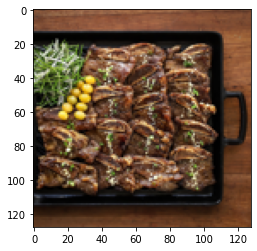

New image prediction :  F18
accuracy : 0.9999991655349731


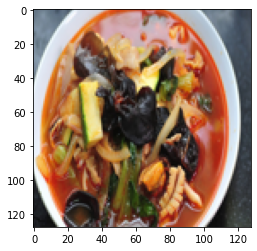

New image prediction :  F6
accuracy : 0.9792361855506897


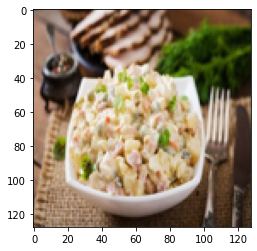

New image prediction :  F6
accuracy : 0.9410284757614136


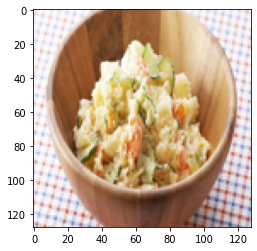

New image prediction :  F3
accuracy : 0.9085878133773804


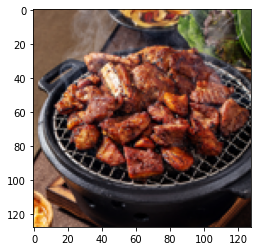

New image prediction :  F1
accuracy : 0.9883654117584229


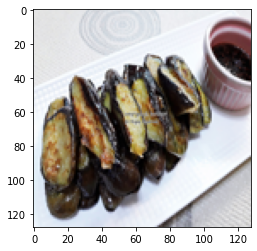

New image prediction :  F4
accuracy : 0.5050956606864929


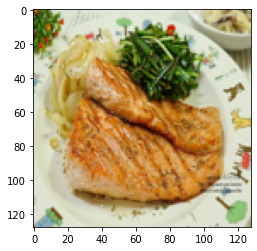

New image prediction :  F16
accuracy : 0.3020809292793274


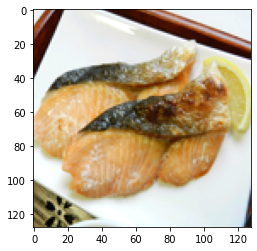

New image prediction :  F2
accuracy : 1.0


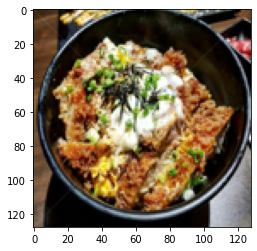

New image prediction :  F16
accuracy : 0.6727374196052551


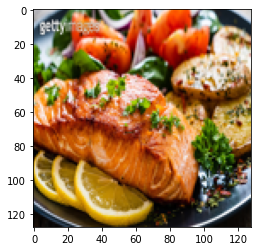

New image prediction :  F13
accuracy : 0.9983012080192566


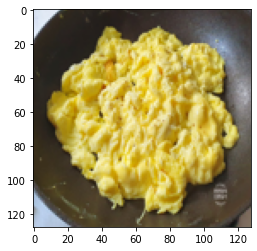

New image prediction :  F13
accuracy : 0.4548076093196869


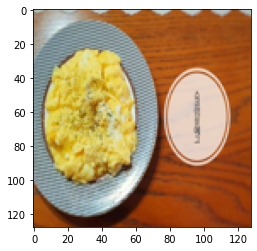

In [ ]:
# test 폴더에 있는 이미지를 이용해서 인식 / 분류 실행 
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline

targetx = 128
targety = 128

test_dir = os.getcwd()+"/test/"

image_path = []
for i in os.listdir(test_dir):
    test_image_name = test_dir + i
    image_path.append(test_image_name)  

for image in image_path:
    img = Image.open(image)
    img = img.convert("RGB")
    img = img.resize((targetx,targety))    
    data = np.asarray(img)
    X = np.array(data)
    X = X.astype("float") / 256
    X = X.reshape(-1, targetx, targety,3)
    
    categories = [f'F{i}' for i in range(1,20)]
    pred = model.predict(X)  
    result = [np.argmax(value) for value in pred]   # 예측 값중 가장 높은 클래스 반환
    # print('New image prediction : ',categories[result[0]])
    # print("accuracy : {}".format(max(pred[0][0],pred[0][1],pred[0][2],pred[0][3],pred[0][4],pred[0][5],pred[0][6],pred[0][7],
    #                                  pred[0][8],pred[0][9],pred[0][10],pred[0][11],pred[0][12],pred[0][13],pred[0][14],pred[0][15],
    #                                  pred[0][16],pred[0][17],pred[0][18])))
    
    plt.imshow(img)
    plt.show()
